# [**1572. Matrix Diagonal Sum**](https://leetcode.com/problems/matrix-diagonal-sum/)
<div><p>Given a&nbsp;square&nbsp;matrix&nbsp;<code>mat</code>, return the sum of the matrix diagonals.</p>

<p>Only include the sum of all the elements on the primary diagonal and all the elements on the secondary diagonal that are not part of the primary diagonal.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/08/14/sample_1911.png" style="width: 336px; height: 174px;">
<pre><strong>Input:</strong> mat = [[<strong>1</strong>,2,<strong>3</strong>],
&nbsp;             [4,<strong>5</strong>,6],
&nbsp;             [<strong>7</strong>,8,<strong>9</strong>]]
<strong>Output:</strong> 25
<strong>Explanation: </strong>Diagonals sum: 1 + 5 + 9 + 3 + 7 = 25
Notice that element mat[1][1] = 5 is counted only once.
</pre>

<p><strong>Example 2:</strong></p>

<pre><strong>Input:</strong> mat = [[<strong>1</strong>,1,1,<strong>1</strong>],
&nbsp;             [1,<strong>1</strong>,<strong>1</strong>,1],
&nbsp;             [1,<strong>1</strong>,<strong>1</strong>,1],
&nbsp;             [<strong>1</strong>,1,1,<strong>1</strong>]]
<strong>Output:</strong> 8
</pre>

<p><strong>Example 3:</strong></p>

<pre><strong>Input:</strong> mat = [[<strong>5</strong>]]
<strong>Output:</strong> 5
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == mat.length == mat[i].length</code></li>
	<li><code>1 &lt;= n &lt;= 100</code></li>
	<li><code>1 &lt;= mat[i][j] &lt;= 100</code></li>
</ul>
</div>


---
## **Solution.py**

In [1]:
from pprint import pprint

In [2]:
from typing import List, Dict, Tuple

In [2]:
class Solution:
    def diagonalSum(self, mat: List[List[int]]) -> int:
        len_mat = len(mat)
        cnt = 0
        idx = 0
        for i in mat:
            if idx == len_mat-idx-1:
                cnt += i[idx]
                # print(mat[i][idx])
            else:
                cnt += i[idx]
                cnt += i[len_mat-idx-1]
                # print(mat[i][idx], mat[i][len_mat-idx-1])
            idx += 1
        return cnt
                            

NameError: name 'List' is not defined

In [3]:
inputs = [
    [[1,2,3],[4,5,6],[7,8,9]],
    [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]],
    [[5]]
]
outputs = [
    25,
    8,
    5
]

In [4]:
solution = Solution().diagonalSum

for idx, (i, o) in enumerate(zip(inputs, outputs)):
    sol_ = solution(i)
    print(sol_==o, sol_, o)

NameError: name 'Solution' is not defined

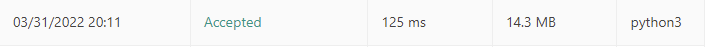

<br>

---
---

<br>

# [**623. Add One Row to Tree**](https://leetcode.com/problems/add-one-row-to-tree/)
<div><p>Given the <code>root</code> of a binary tree and two integers <code>val</code> and <code>depth</code>, add a row of nodes with value <code>val</code> at the given depth <code>depth</code>.</p>

<p>Note that the <code>root</code> node is at depth <code>1</code>.</p>

<p>The adding rule is:</p>

<ul>
	<li>Given the integer <code>depth</code>, for each not null tree node <code>cur</code> at the depth <code>depth - 1</code>, create two tree nodes with value <code>val</code> as <code>cur</code>'s left subtree root and right subtree root.</li>
	<li><code>cur</code>'s original left subtree should be the left subtree of the new left subtree root.</li>
	<li><code>cur</code>'s original right subtree should be the right subtree of the new right subtree root.</li>
	<li>If <code>depth == 1</code> that means there is no depth <code>depth - 1</code> at all, then create a tree node with value <code>val</code> as the new root of the whole original tree, and the original tree is the new root's left subtree.</li>
</ul>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/03/15/addrow-tree.jpg" style="width: 500px; height: 231px;">
<pre><strong>Input:</strong> root = [4,2,6,3,1,5], val = 1, depth = 2
<strong>Output:</strong> [4,1,1,2,null,null,6,3,1,5]
</pre>

<p><strong>Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/03/11/add2-tree.jpg" style="width: 500px; height: 277px;">
<pre><strong>Input:</strong> root = [4,2,null,3,1], val = 1, depth = 3
<strong>Output:</strong> [4,2,null,1,1,3,null,null,1]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[1, 10<sup>4</sup>]</code>.</li>
	<li>The depth of the tree is in the range <code>[1, 10<sup>4</sup>]</code>.</li>
	<li><code>-100 &lt;= Node.val &lt;= 100</code></li>
	<li><code>-10<sup>5</sup> &lt;= val &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= depth &lt;= the depth of tree + 1</code></li>
</ul>
</div>

## **Solution.py**

In [6]:
from typing import List, Dict, Tuple

In [7]:
from collections import deque
from copy import deepcopy

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    
def insert_by_depth(root, depth, val):
    if depth == 1:
        tmp = deepcopy(root)
        return TreeNode(val, left=tmp)

    queue = deque( [(1, root)] )
    while queue:
        d, node = queue.popleft()
        if d == depth-1 and node:
            l_tmp = deepcopy(node.left)
            r_tmp = deepcopy(node.right)
            node.left = TreeNode(val, left=l_tmp)
            node.right = TreeNode(val, right=r_tmp)
        if node:
            queue.append((d+1, node.left))
            queue.append((d+1, node.right))
        if d >= depth or all( (not x for x in queue) ):
            break
    return root

class Solution:
    def addOneRow(self, root: TreeNode, val: int, depth: int) -> TreeNode:
        root = insert_by_depth(root, depth, val)
        return root

<img width="330" alt="image" src="https://user-images.githubusercontent.com/42428487/161006130-17be91e9-5079-452f-ab34-c93b3d073225.png">

In [8]:
from collections import deque
from copy import deepcopy

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class BinarySearchTree:
    def __init__(self, root=None):
        self.root = root
    
    def creatBTree(self, arr, idx=0):
        pNode = None
        if idx < len(arr):
            if arr[idx] == None:
                return
            pNode = TreeNode(arr[idx])
            pNode.left  = self.creatBTree(arr, 2 * idx + 1)  # [1, 3, 7, 15, ...]
            pNode.right = self.creatBTree(arr, 2 * idx + 2)  # [2, 5, 12, 25, ...]
        self.root = pNode
        return pNode
    
    def insert_by_depth(self, depth, val):
        if depth == 1:
            tmp = deepcopy(self.root)
            self.root = TreeNode(val, left=tmp)
        
        else:
            queue = deque( [(1, self.root)] )
            while queue:
                d, node = queue.popleft()
                if d == depth-1 and node:
                    l_tmp = deepcopy(node.left)
                    r_tmp = deepcopy(node.right)
                    node.left = TreeNode(val, left=l_tmp)
                    node.right = TreeNode(val, right=r_tmp)
                if node:
                    queue.append((d+1, node.left))
                    queue.append((d+1, node.right))
                if d >= depth or all( (not x for x in queue) ):
                    break

    def BTree2List(self):
        arr = []
        queue = deque( [self.root] )
        while queue:
            node = queue.popleft()
            if node:
                arr.append(node.val)
                queue.append(node.left)
                queue.append(node.right)
            else:
                arr.append(None)
            if all( (not x for x in queue) ):
                break
        return arr
        
class Solution:
    def addOneRow(self, root: List, val: int, depth: int) -> List:
        bst = BinarySearchTree()
        bst.creatBTree(root)
        bst.insert_by_depth(depth, val)
        return bst.BTree2List()

In [9]:
inputs = [
    ([4,2,6,3,1,5], 1, 2),
    ([4,2,None,3,1], 1, 3),
]
outputs = [
    [4,1,1,2,None,None,6,3,1,5],
    [4,2,None,1,1,3,None,None,1]
]

In [10]:
solution = Solution().addOneRow

for idx, (i, o) in enumerate(zip(inputs, outputs)):
    sol_ = solution(*i)
    print(sol_==o, sol_, o)

True [4, 1, 1, 2, None, None, 6, 3, 1, 5] [4, 1, 1, 2, None, None, 6, 3, 1, 5]
True [4, 2, None, 1, 1, 3, None, None, 1] [4, 2, None, 1, 1, 3, None, None, 1]
